## gpu test 

In [1]:
!nvidia-smi

/bin/bash: /home/hamid/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Tue Oct 31 07:10:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.01              Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti     On  | 00000000:2B:00.0  On |                  N/A |
|  0%   29C    P8              12W / 200W |    396MiB /  8192MiB |     21%      Default |
|                                       

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)


2023-10-31 07:10:22.078611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 07:10:22.078654: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 07:10:22.079985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 07:10:22.194128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 07:10:25.183541: I tensorflow/compiler/

## preparing images

In [3]:
import os
import glob
import shutil
import utils



from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


from keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt

### split images into train ,test and validation 

In [93]:

images_path='./images'
path_to_save_train='./Train/train'
path_to_save_val='./Train/val'
path_to_save_test='./Test'

utils.slpit_data(images_path,path_to_save_train,path_to_save_val,path_to_save_test)


### creating the generators

In [4]:
train_path='./Train/train/'
val_path='./Train/val/'
test_path='./Test/'

train_gen,val_gen,test_gen=utils.generators(train_path,val_path,test_path)
n=train_gen.num_classes

Found 5320 images belonging to 2 classes.
Found 592 images belonging to 2 classes.
Found 1478 images belonging to 2 classes.


## model section

### creating the model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,GlobalAvgPool2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.regularizers import l2


In [6]:
#model to classify cat and dog
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())



model.add(GlobalAvgPool2D())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

2023-10-31 07:10:26.221937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-31 07:10:26.222010: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-31 07:10:26.222033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-31 07:10:27.372906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-31 07:10:27.372990: I tensorflow/compile

 global_average_pooling2d (  (None, 256)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 609282 (2.32 MB)
Trainable params: 607682 (2.32 MB)
Non-trainable params: 1600 (6.25 KB)
_________________________________________________________________


In [7]:

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


### fiting the model

In [8]:

early_stop=EarlyStopping(monitor='val_accuracy',patience=20,restore_best_weights=True)
checkPoint=ModelCheckpoint('model3_binary.h5',monitor='val_accuracy',save_best_only=True,mode='max')

model.fit(train_gen,validation_data=val_gen,epochs=75,callbacks=[early_stop,checkPoint])


Epoch 1/75


2023-10-31 07:10:31.317245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-31 07:10:34.634105: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbde425e2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 07:10:34.634166: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-10-31 07:10:34.641169: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 07:10:34.742764: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/84 [==============================] - 57s 536ms/step - loss: 0.7881 - accuracy: 0.6019 - val_loss: 0.6533 - val_accuracy: 0.6639
Epoch 2/75


/home/hamid/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


84/84 [==============================] - 37s 440ms/step - loss: 0.6718 - accuracy: 0.6637 - val_loss: 0.6747 - val_accuracy: 0.6791
Epoch 3/75
84/84 [==============================] - 41s 489ms/step - loss: 0.6176 - accuracy: 0.6992 - val_loss: 0.9246 - val_accuracy: 0.3243
Epoch 4/75
84/84 [==============================] - 33s 386ms/step - loss: 0.5744 - accuracy: 0.7252 - val_loss: 1.3613 - val_accuracy: 0.3243
Epoch 5/75
84/84 [==============================] - 42s 493ms/step - loss: 0.5231 - accuracy: 0.7577 - val_loss: 0.9243 - val_accuracy: 0.3851
Epoch 6/75
84/84 [==============================] - 37s 436ms/step - loss: 0.4670 - accuracy: 0.7897 - val_loss: 0.8310 - val_accuracy: 0.4662
Epoch 7/75
84/84 [==============================] - 39s 459ms/step - loss: 0.4213 - accuracy: 0.8126 - val_loss: 0.4321 - val_accuracy: 0.8057
Epoch 8/75
84/84 [==============================] - 38s 448ms/step - loss: 0.3556 - accuracy: 0.8474 - val_loss: 1.3145 - val_accuracy: 0.4341
Epoch 9/75

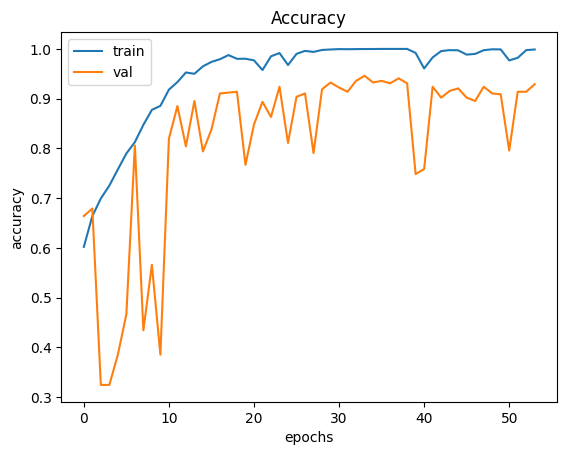

In [9]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()


### evaluating the model

In [10]:
model.evaluate(test_gen)

24/24 [==============================] - 9s 389ms/step - loss: 0.2552 - accuracy: 0.9317


[0.25518807768821716, 0.9316644072532654]

In [11]:
model.evaluate(train_gen)

84/84 [==============================] - 33s 398ms/step - loss: 3.6242e-04 - accuracy: 1.0000


[0.0003624226665124297, 1.0]

### testing on random images

1/1 [==============================] - 0s 14ms/step


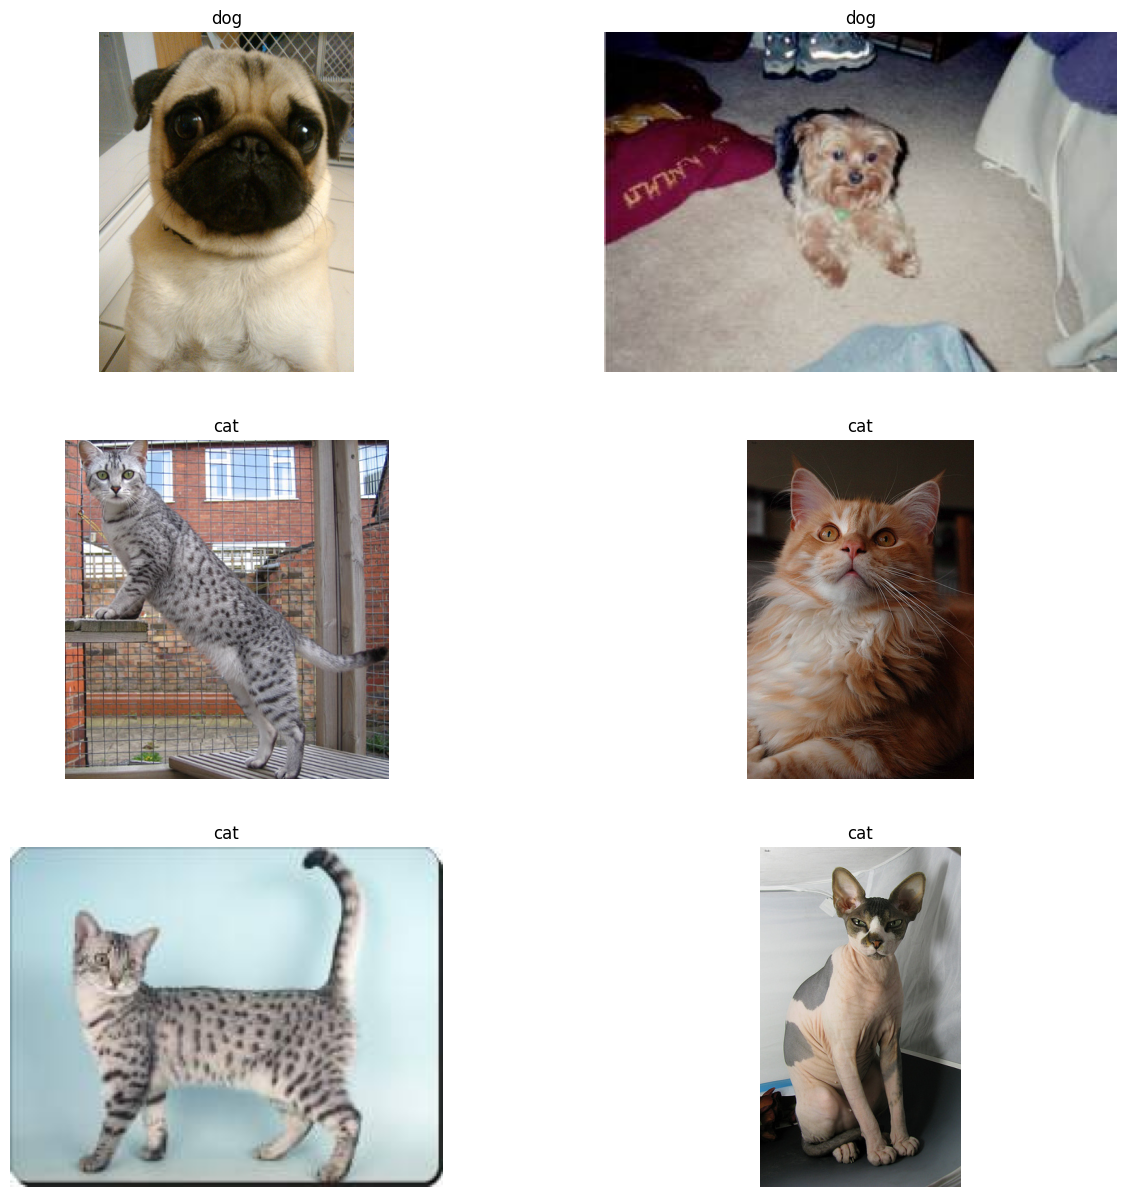

In [12]:
import random
import cv2
plt.figure(figsize=(15,15))
for i in range(6):
    subfolder=random.choice(os.listdir(test_path))
    path=os.path.join(test_path,subfolder)
    img=random.choice(os.listdir(path))
    img_path=os.path.join(path,img)
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pred=utils.predict_with_model(model,img_path)
    plt.subplot(3,2,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(pred)
plt.show()


    


### model.h5 is the best model it's the same as model 3 but trined on another split

In [170]:
m=tf.keras.models.load_model('model.h5')
m.evaluate(train_gen)

84/84 [==============================] - 36s 422ms/step - loss: 0.0673 - accuracy: 0.9823


[0.06732460856437683, 0.9823307991027832]

In [171]:
m.evaluate(test_gen)


24/24 [==============================] - 9s 377ms/step - loss: 0.0742 - accuracy: 0.9790


[0.0742320641875267, 0.9790257215499878]

In [172]:
m.evaluate(val_gen)

10/10 [==============================] - 4s 396ms/step - loss: 0.0731 - accuracy: 0.9747


[0.07311450690031052, 0.974662184715271]